# E Commerce Application

### Background: 
This portfolio aims to analyze and discover product information matter to E commerce business.

This project is divided into 2 parts. The first part I will explore the first dataset to idenify the brand that matter most. For examples, 1. the substitute items, 2. instances of people purchasing more expensive substitute, 3. the brands that people care about, 4. Who are these people, 5. When and why do these brands matter?


In this portoflio I want to focus on the category Adhesives & Sealants, a category of products that are not well-codified. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# helper function
def plot_feature(df, col):
    plt.figure(figsize = (14, 6))
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        df[col] = df[col].astype('category')
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title('Distribution of'+ " "+ col)
    plt.show()

# Discover the Data



### Results  from the EDA

1. The most popular category in l2 is tape, and that in l3 is Electrical tape
2. 1793 is the most popular brand. People mainly buy electrical tape, packing tape, masking tape from this brand.
3. The next most popular brand is 2515. The customers are those who bought threadlockers ,instant adhesisves ,gasket sealants
4. The most popular product ID among the 1793 brand is 100164. The substitute items are 100166,100167,100168
5. The most popular product ID among the 2515 brand is 271899. The substitute items are 100181,276226,276287

In [3]:
# import dataset
product = pd.read_table('dataset/Transactions with A&S.txt',skiprows =1,names= ('order_num','l1','l2','l3','productid','brand'))
product = product[(product['l1']=='Adhesives, Sealants and Tape')]


In [5]:
product.head()

,order_num,l1,l2,l3,productid,brand
0,1182478,"Adhesives, Sealants and Tape",Putties,Putties,122821,2180
1,63908,"Adhesives, Sealants and Tape",Caulks,Caulks and Sealants,276172,1054
2,1165840,"Adhesives, Sealants and Tape",Concrete and Asphalt,Concrete Cleaners and Sealers,110119,4326
4,1088891,"Adhesives, Sealants and Tape",Glues and Cements,Retaining Compounds,251285,2515
5,883665,"Adhesives, Sealants and Tape",Tapes,Anti-Slip Tapes,8040,934


In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691328 entries, 0 to 3387278
Data columns (total 6 columns):
order_num    691328 non-null int64
l1           691328 non-null object
l2           691328 non-null object
l3           691328 non-null object
productid    691328 non-null int64
brand        691328 non-null int64
dtypes: int64(3), object(3)
memory usage: 36.9+ MB


In [7]:
product.isnull().any()

order_num    False
l1           False
l2           False
l3           False
productid    False
brand        False
dtype: bool

In [8]:
product.describe(include=['O'])

,l1,l2,l3
count,691328,691328,691328
unique,1,9,51
top,"Adhesives, Sealants and Tape",Tapes,Electrical Tapes
freq,691328,331739,113119


In [10]:
product.describe(include=[np.number])

,order_num,productid,brand
count,6.913280e+05,691328.000000,691328.000000
mean,8.294248e+05,152496.403364,2294.912212
std,4.082508e+05,97657.935304,1408.010418
min,1.000000e+01,89.000000,2.000000
25%,8.277620e+05,71735.000000,1054.000000
50%,9.901800e+05,124838.000000,2515.000000
75%,1.109932e+06,261519.000000,3706.000000
max,1.238617e+06,333076.000000,4825.000000


In [18]:
product.shape

(691328, 6)

In [31]:
print('{} product_id is unique'.format(product.productid.nunique()))

6185 product_id is unique


In [32]:
print('{} product brand is unique'.format(product.brand.nunique()))

226 product brand is unique


In [33]:
print('{} order_num is unique'.format(product.order_num.nunique()))

479917 order_num is unique


#### From here we know that the order of informative categorical features are product brand, product id, and order number. 
#### For the numerical features, we want to focus on l2 and l3

In [16]:
cat_var = ['l1','l2','l3']
num_var = ['productid','brand']

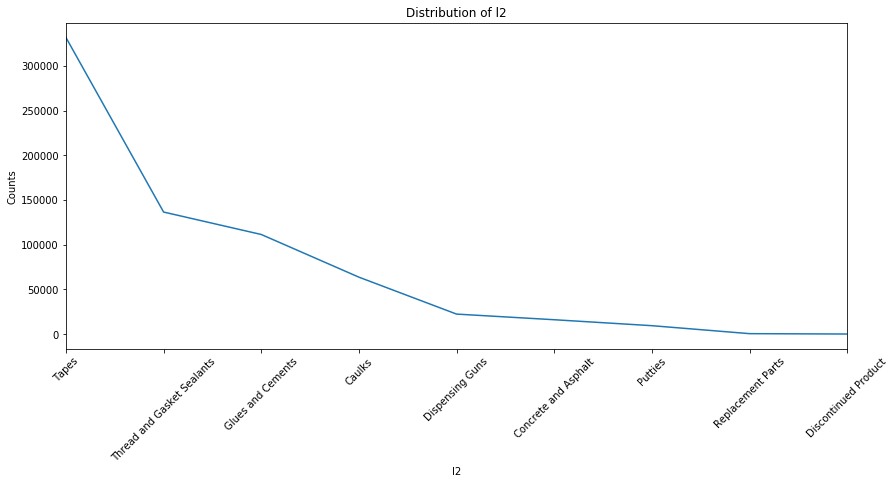

In [18]:
plot_feature(product,'l2')

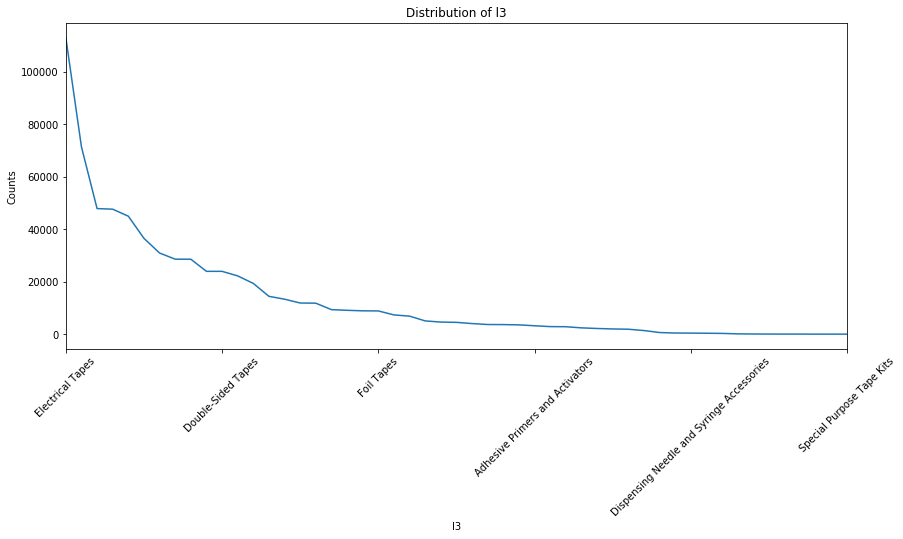

In [19]:
plot_feature(product,'l3')

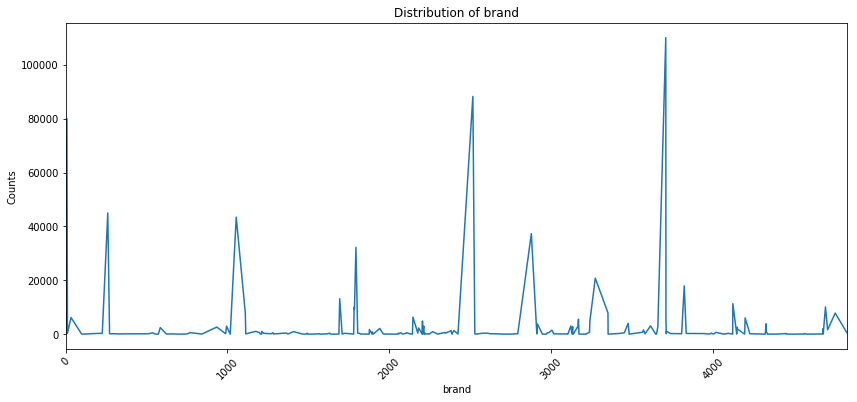

In [20]:
plot_feature(product,'brand')

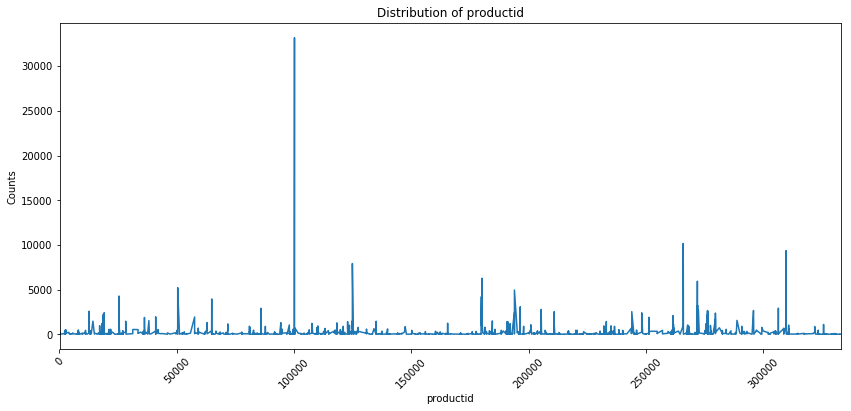

In [21]:
plot_feature(product,'productid')

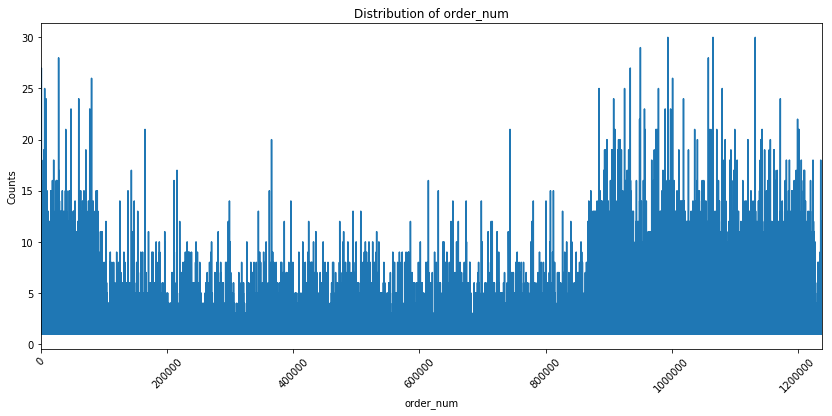

In [22]:
plot_feature(product,'order_num')

In [40]:
# Find the top 5 most popular brand 
product['brand'].value_counts().sort_values(ascending=False).head(5)


3706    110095
2515     88261
9        80093
261      45008
1054     43425
Name: brand, dtype: int64

In [49]:
# Find the productId with the highest count
product['productid'].value_counts().sort_values(ascending=False).head(5)

100164    33186
265850    10161
309746     9364
124839     7910
265894     7609
Name: productid, dtype: int64

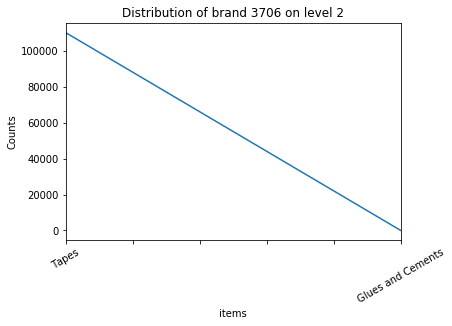

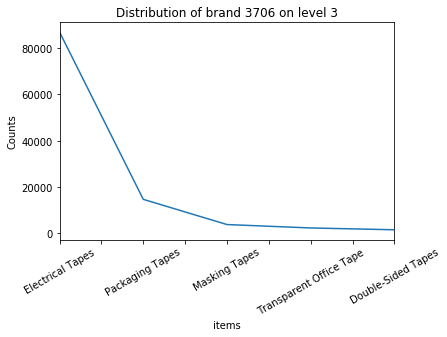

In [54]:
# These are the top 5 most popular items based on brand 3706, the most popular brand

lv2_3706 =product[(product['brand']==3706)]['l2'].value_counts().head(5).plot()
plt.xticks(rotation=30)
plt.xlabel('items')
plt.ylabel('Counts')
plt.title('Distribution of brand 3706 on level 2')
plt.show()

lv3_3706 =product[(product['brand']==3706)]['l3'].value_counts().head(5).plot()
plt.xticks(rotation=30)
plt.xlabel('items')
plt.ylabel('Counts')
plt.title('Distribution of brand 3706 on level 3')
plt.show()


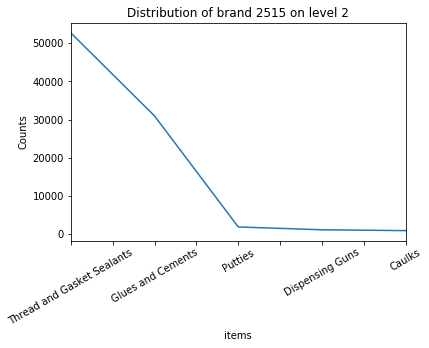

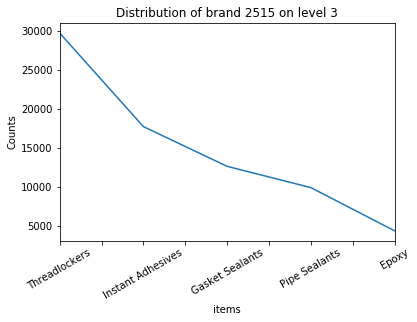

In [81]:
# These are the top 5 most popular items based on brand 2515, the 2rd most popular brand

lv2_3706 =product[(product['brand']==2515)]['l2'].value_counts().head(5).plot()
plt.xticks(rotation=30)
plt.xlabel('items')
plt.ylabel('Counts')
plt.title('Distribution of brand 2515 on level 2')
plt.show()

lv3_3706 =product[(product['brand']==2515)]['l3'].value_counts().head(5).plot()
plt.xticks(rotation=30)
plt.xlabel('items')
plt.ylabel('Counts')
plt.title('Distribution of brand 2515 on level 3')
plt.show()


##### Here we want to find out the most popular product ID from those brand

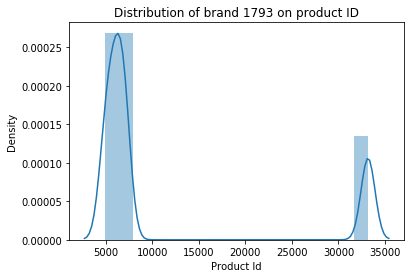

In [77]:
plt.figure()
sns.distplot(product[(product['brand']==3706)]['productid'].value_counts().head(5))

plt.xlabel('Product Id')
plt.ylabel('Density')
plt.title('Distribution of brand 1793 on product ID')
plt.show()

In [78]:
product[(product['brand']==3706)]['productid'].value_counts().head(5)

100164    33186
100166     7060
100168     6494
100167     5753
100171     4923
Name: productid, dtype: int64

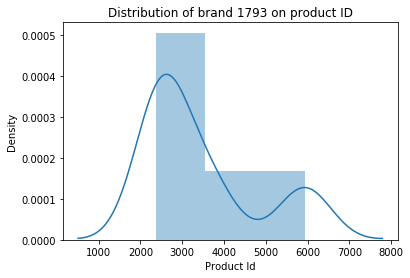

In [82]:
plt.figure()
sns.distplot(product[(product['brand']==2515)]['productid'].value_counts().head(5))

plt.xlabel('Product Id')
plt.ylabel('Density')
plt.title('Distribution of brand 1793 on product ID')
plt.show()

In [84]:
product[(product['brand']==2515)]['productid'].value_counts().head(5)

271899    5930
100181    3660
276226    2652
276287    2569
279591    2370
Name: productid, dtype: int64